$Atividade (2.5):$ Utilizando o conjunto de dados Iris Dataset (disponibilizado no sigaa) realize as seguintes atividades:
<ol>
    <li> Considerando as colunas 'petal_length' e 'petal_width', gerar a curva cotovelo e definir o número ideal de clusters (K), conforme tal curva; </li>
    <li> Inicializar os centróides usando diferentes valores de tentativa randômica e o kmeans++. Em seguida, imprima os valores dos centróides; </li>
    <li> Mostrar os gráfico dos clusters e seus respectivos centróides para cada técnica de inicialização dos centróides. </li>
</ol>

# Apredizado Não Supervisionado: Clusterização c/ K-means

## Importando as bibliotecas

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Aquisição de dados

In [155]:
dataset = pd.read_csv('iris_flower.csv')
dataset

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [156]:
X = dataset.iloc[:, [2, 3]].values

## 2. Definição o número de clusters

550.6434666666668
86.40394533571003
31.38775897435898
19.49940089968511
14.084349656750573
11.079414800946152
9.514800341130606
8.27823823689659
6.8327306680247855
5.611947431653314
5.107683659477776


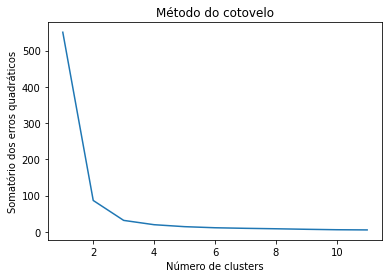

In [157]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    print(kmeans.inertia_)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 12), wcss)
plt.title('Método do cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('Somatório dos erros quadráticos')
plt.show()

## 3. Treinamento do modelo

### 3.1 n_cluster = 2

In [158]:
kmeans = KMeans(n_clusters = 2, init = 'random', n_init=100)
y_kmeans = kmeans.fit_predict(X)

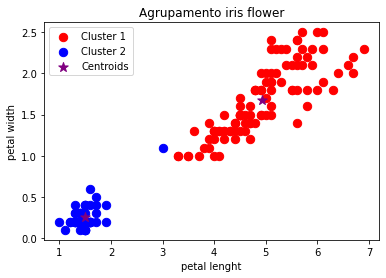

In [159]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 70, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 70, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s = 100, c = 'purple', label = 'Centroids')
plt.title('Agrupamento iris flower')
plt.xlabel('petal lenght')
plt.ylabel('petal width')
plt.legend()
plt.show()

### 3.2 n_cluster = 3

In [168]:
kmeans = KMeans(n_clusters = 3, init = 'random', n_init=100)
y_kmeans = kmeans.fit_predict(X)

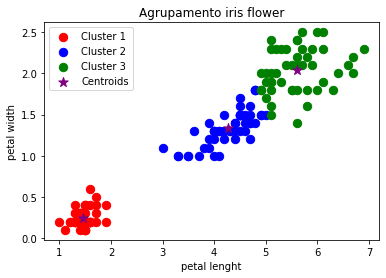

In [161]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 70, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 70, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 70, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s = 100, c = 'purple', label = 'Centroids')
plt.title('Agrupamento iris flower')
plt.xlabel('petal lenght')
plt.ylabel('petal width')
plt.legend()
plt.show()

### 3.3 n_cluster = 4

In [162]:
kmeans = KMeans(n_clusters = 4, init = 'random', n_init=100)
y_kmeans = kmeans.fit_predict(X)

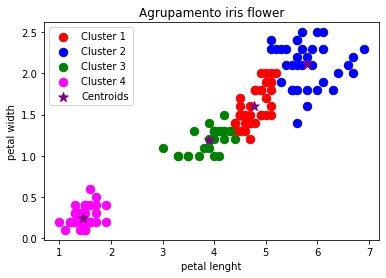

In [163]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 70, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 70, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 70, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 70, c = 'magenta', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s = 100, c = 'purple', label = 'Centroids')
plt.title('Agrupamento iris flower')
plt.xlabel('petal lenght')
plt.ylabel('petal width')
plt.legend()
plt.show()

## 4. Inicializar os centróides usando diferentes valores de tentativa randômica e o kmeans++.

In [170]:
vKmeans = []
vKmeanspp = []

[[5.59583333 2.0375    ]
 [4.26923077 1.34230769]
 [1.464      0.244     ]]


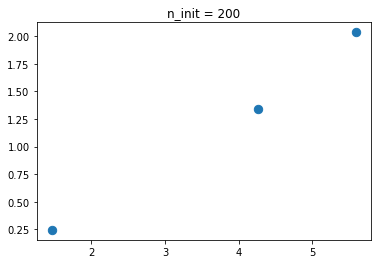

[[4.26923077 1.34230769]
 [1.464      0.244     ]
 [5.59583333 2.0375    ]]


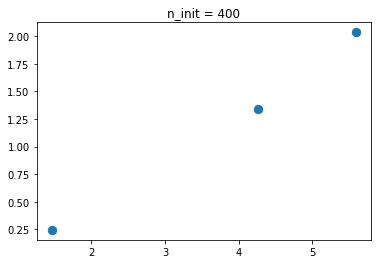

[[4.26923077 1.34230769]
 [1.464      0.244     ]
 [5.59583333 2.0375    ]]


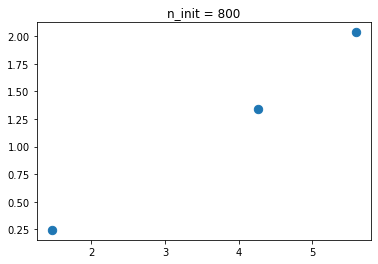

[[5.59583333 2.0375    ]
 [4.26923077 1.34230769]
 [1.464      0.244     ]]


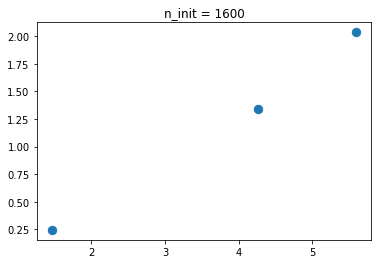

In [171]:
from sklearn.cluster import KMeans
for i in range(1, 5):
    kmeans = KMeans(n_clusters = 3, init = 'random', n_init=100*2**i)
    kmeans.fit(X)
    #print(kmeans.inertia_)
    vKmeans.append(kmeans)
    print(kmeans.cluster_centers_)
    plt.title(f'n_init = {100*2**i}')
    plt.scatter(list(map(lambda x: x[0], kmeans.cluster_centers_)), list(map(lambda x: x[1], kmeans.cluster_centers_)), s = 70)
    plt.show()

[[4.26923077 1.34230769]
 [5.59583333 2.0375    ]
 [1.464      0.244     ]]


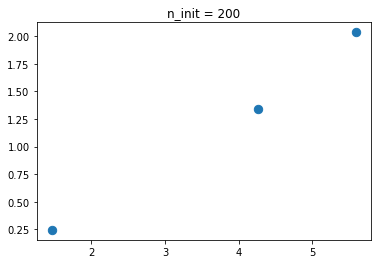

[[5.59583333 2.0375    ]
 [1.464      0.244     ]
 [4.26923077 1.34230769]]


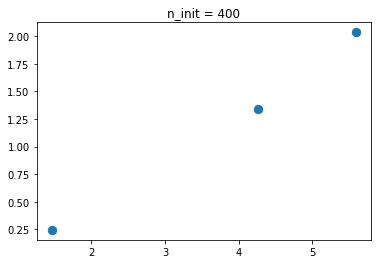

[[1.464      0.244     ]
 [5.59583333 2.0375    ]
 [4.26923077 1.34230769]]


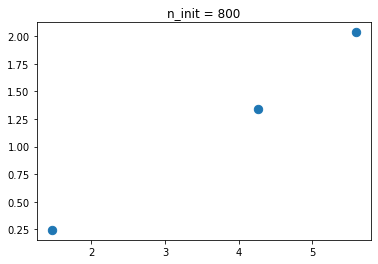

[[4.26923077 1.34230769]
 [1.464      0.244     ]
 [5.59583333 2.0375    ]]


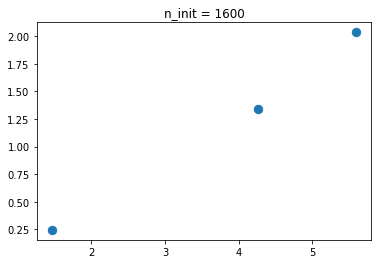

In [172]:
for i in range(1, 5):
    kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init=100*2**i)
    kmeans.fit(X)
    #print(kmeans.inertia_)
    vKmeanspp.append(kmeans)
    plt.title(f'n_init = {100*2**i}')
    print(kmeans.cluster_centers_)
    plt.scatter(list(map(lambda x: x[0], kmeans.cluster_centers_)), list(map(lambda x: x[1], kmeans.cluster_centers_)), s = 70)
    plt.show()

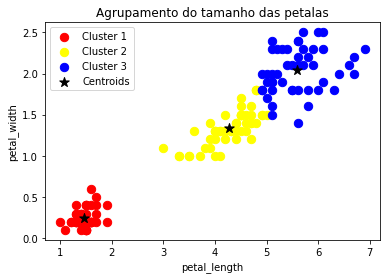

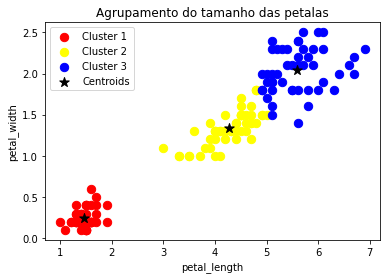

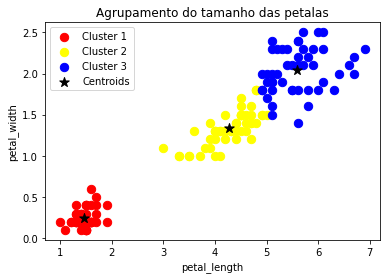

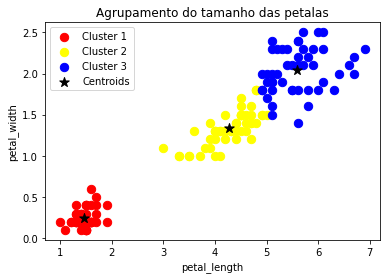

In [169]:
for kmeans in vKmeans:
    plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 70, c = 'red', label = 'Cluster 1')
    plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 70, c = 'yellow', label = 'Cluster 2')
    plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 70, c = 'blue', label = 'Cluster 3')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s = 100, c = 'black', label = 'Centroids')
    plt.title('Agrupamento do tamanho das petalas')
    plt.xlabel('petal_length')
    plt.ylabel('petal_width')
    plt.legend()
    plt.show()